In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
n = 10

In [26]:
neighbourhood = np.random.binomial(1, 0.5, size=(n, n))

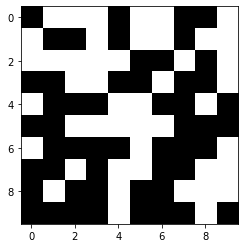

In [33]:
plt.imshow(neighbourhood, cmap = plt.cm.gray)

In [55]:
def move(neighbourhood, R=0.5):
    
    exp_neighbourhood = np.zeros(shape=(n+2, n+2))
    exp_neighbourhood[0,0] = neighbourhood[2,2].copy()
    exp_neighbourhood[0,n+1] = neighbourhood[2,n-3].copy()
    exp_neighbourhood[n+1,0] = neighbourhood[n-3, 2].copy()
    exp_neighbourhood[n+1,n+1] = neighbourhood[n-3,n-3].copy()
    exp_neighbourhood[1:n+1, 0] = neighbourhood[:, 2].copy()
    exp_neighbourhood[1:n+1, n+1] = neighbourhood[:, n-3].copy()
    exp_neighbourhood[0, 1:n+1] = neighbourhood[2, :].copy()
    exp_neighbourhood[n+1, 1:n+1] = neighbourhood[n-3, :].copy()
    exp_neighbourhood[1:n+1, 1:n+1] = neighbourhood.copy()

    line = neighbourhood.copy().ravel()
    want_to_move = []
    for i in range(exp_neighbourhood.shape[0]-2):
        for j in range(exp_neighbourhood.shape[1]-2):
            if np.sum(exp_neighbourhood[i:i+3, j:j+3]) == 9:
                ratio = 1
            else:
                ratio = (np.sum(exp_neighbourhood[i:i+3, j:j+3]) - neighbourhood[i,j])/ 8
            if neighbourhood[i,j] == 0 and ratio > 1 - R:
                want_to_move.append(neighbourhood.shape[1] * i + j)
            elif neighbourhood[i, j] == 1 and ratio < R:
                want_to_move.append(neighbourhood.shape[1] * i + j)
    
    #line1 = line.copy()
    line_slice = line[want_to_move].copy()
    np.random.shuffle(line_slice)
    line[want_to_move] = line_slice
    #print(line1 == line)
    
    new_neighbourhood = line.reshape(neighbourhood.shape[1], -1)
    
    
    return len(want_to_move), new_neighbourhood

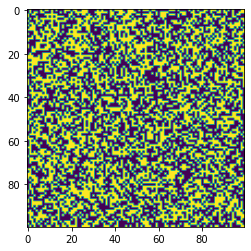

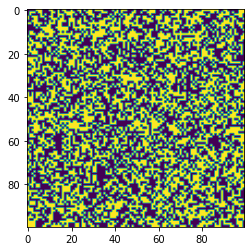

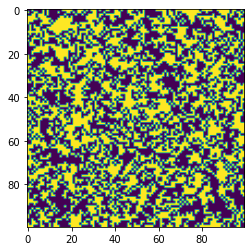

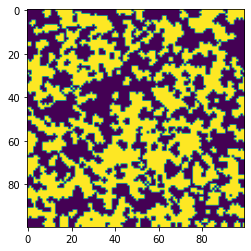

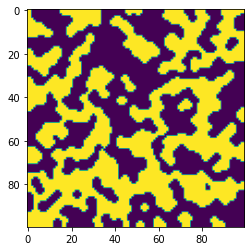

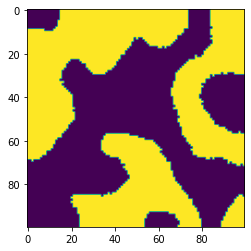

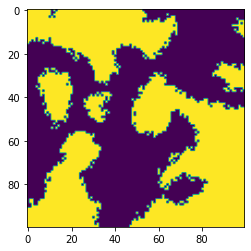

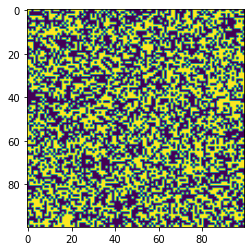

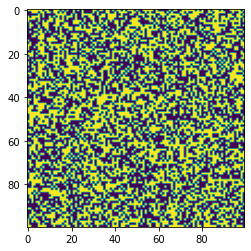

In [53]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
 
n = 100
for r in np.arange(9):
    neighbourhood = np.random.binomial(1, 0.5, size=(n, n))

    fig = plt.figure()

    camera = Camera(fig)
    for i in range(100):
        neighbourhood = move(neighbourhood, r/8)
        plt.imshow(neighbourhood)
        camera.snap()

    animation = camera.animate()
    animation.save(f'model_{r}.gif', writer = 'imagemagick')

<Figure size 432x288 with 0 Axes>

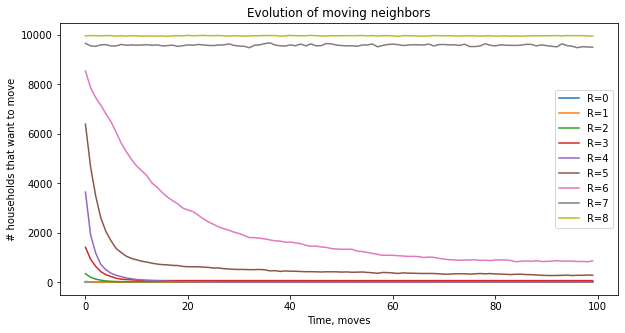

In [58]:
fig = plt.figure()

neighbourhood = np.random.binomial(1, 0.5, size=(n, n))

plt.figure(figsize=(10,5))
plt.title('Evolution of moving neighbors')
for r in np.arange(9):
    new_neighbourhood = neighbourhood.copy()
    wants = []
    for i in range(100):
        want_to_move, new_neighbourhood = move(new_neighbourhood, r/8)
        wants.append(want_to_move)
    plt.plot(list(range(100)), wants, label=f'R={r}')

plt.xlabel('Time, moves')
plt.ylabel('# households that want to move')
plt.legend()

    